<a href="https://colab.research.google.com/github/antyaalhikmah/Statmul-UAS/blob/main/Statistik%20Multivariat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import data

In [ ]:
#Data
# Loading Data:
import pandas as pd
try: # Running Locally, yakinkan "file_" berada di folder "data"
    data = pd.read_csv("Data/data-provinsi.csv", low_memory = False, encoding='utf8')

except: # Running in Google Colab
    url = "https://raw.githubusercontent.com/antyaalhikmah/Statmul-UAS/main/data-provinsi.csv"
    # Mengunduh file menggunakan wget
    !wget -P Data/ {url}
    # Membaca file yang telah diunduh ke dalam DataFrame
    data = pd.read_csv("Data/data-provinsi.csv", low_memory=False, encoding='utf8')

# Menampilkan beberapa baris pertama dari DataFrame
print(data.head())

--2024-07-17 12:49:16--  https://raw.githubusercontent.com/antyaalhikmah/Statmul-UAS/main/data-provinsi.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1111 (1.1K) [text/plain]
Saving to: ‘Data/data-provinsi.csv’

data-provinsi.csv   100%[===================>]   1.08K  --.-KB/s    in 0s      

2024-07-17 12:49:17 (49.5 MB/s) - ‘Data/data-provinsi.csv’ saved [1111/1111]

         Provinsi   2023   2022   2021
0            Aceh  77.53  80.82  80.92
1  Sumatera Utara  80.34  79.53  77.60
2  Sumatera Barat  76.27  77.35  78.51
3            Riau  75.55  73.64  75.66
4           Jambi  74.47  77.19  72.91


In [ ]:
data.shape

(34, 4)

In [ ]:
#Data2
# Loading Data:
import pandas as pd
try: # Running Locally, yakinkan "file_" berada di folder "data"
    data2 = pd.read_csv("Data/data-liver.csv", low_memory = False, encoding='utf8')

except: # Running in Google Colab
    url = "https://raw.githubusercontent.com/antyaalhikmah/Statmul-UAS/main/data-liver.csv"
    # Mengunduh file menggunakan wget
    !wget -P Data/ {url}
    # Membaca file yang telah diunduh ke dalam DataFrame
    data2 = pd.read_csv("Data/data-liver.csv", low_memory=False, encoding='utf8')

# Menampilkan beberapa baris pertama dari DataFrame
print(data2.head())

--2024-07-17 12:49:17--  https://raw.githubusercontent.com/antyaalhikmah/Statmul-UAS/main/data-liver.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151940 (148K) [text/plain]
Saving to: ‘Data/data-liver.csv’

data-liver.csv      100%[===================>] 148.38K  --.-KB/s    in 0.006s  

2024-07-17 12:49:17 (25.8 MB/s) - ‘Data/data-liver.csv’ saved [151940/151940]

   Age  Gender        BMI  AlcoholConsumption  Smoking  GeneticRisk  \
0   58       0  35.857584           17.272828        0            1   
1   71       1  30.732470            2.201266        0            1   
2   48       0  19.971407           18.500944        0            0   
3   34       1  16.615417           12.632870        0            0   
4   62       1  16.065830            1.

#PCA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Mengubah kolom kategorikal menjadi numerik
label_encoder = LabelEncoder()
data['Provinsi'] = label_encoder.fit_transform(data['Provinsi'])

# Memisahkan fitur (X) dan target (y)
X = data[['Provinsi', '2023', '2022', '2021']]

# Standarisasi fitur
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Melakukan PCA
pca = PCA(n_components=2) # Mengurangi dimensi ke 2 komponen utama
principal_components = pca.fit_transform(data_scaled)

# Membuat DataFrame untuk komponen utama
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df.head(10)

,PC1,PC2
0,-1.396395,-1.182780
1,-0.253085,1.765649
2,0.281617,1.537256
3,0.936162,0.663045
4,0.519928,-1.179186
5,-0.266535,1.743974
6,0.870263,-1.679676
7,-0.634692,0.445592
8,0.510363,-0.228801
9,-0.547825,0.308991



Varians yang dijelaskan oleh setiap komponen utama:
[0.69712743 0.21881869]

Total varians yang dijelaskan oleh dua komponen utama: 91.59%


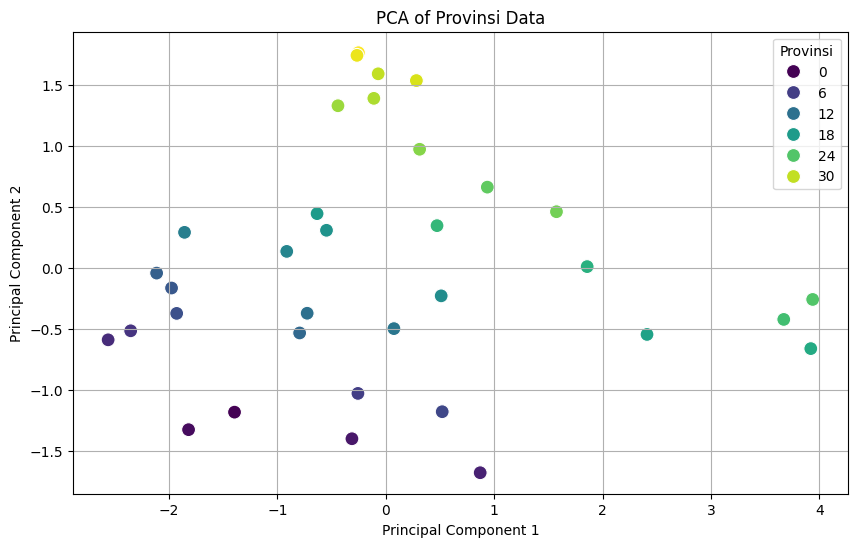

In [ ]:
# Menambahkan kolom Provinsi kembali untuk keperluan interpretasi
principal_df['Provinsi'] = data['Provinsi']

# Menampilkan varians yang dijelaskan oleh setiap komponen utama
explained_variance = pca.explained_variance_ratio_
print("\nVarians yang dijelaskan oleh setiap komponen utama:")
print(explained_variance)

# Menampilkan total varians yang dijelaskan oleh dua komponen utama
total_explained_variance = sum(explained_variance)
print(f"\nTotal varians yang dijelaskan oleh dua komponen utama: {total_explained_variance * 100:.2f}%")

# Membuat plot PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=principal_df, hue='Provinsi', palette='viridis', s=100)
plt.title('PCA of Provinsi Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Provinsi', loc='best', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

#Analisis Faktor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 594.0 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=571dfbff1c6c7ced2fe8664fb840d4deecb468ad2fb610d33415822e0dcbcb2a
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer
KMO Model: 0.7343554731222413
Bartlett’s Test: Chi-Square Value = 88.58911676306067, p-value = 5.948280152079681e-17
Eigenvalues: [2.87301001 0.90179822 0.24680224 0.09960165]

Komponen Faktor:
    Factor1   Factor2  Provinsi
0 -0.374350  0.444845         0
1 -0.463562 -0.976171        33
2  0.120046 -1.116816        31
3  0.470289 -0.382601        25
4  0.435814  0.693647         7


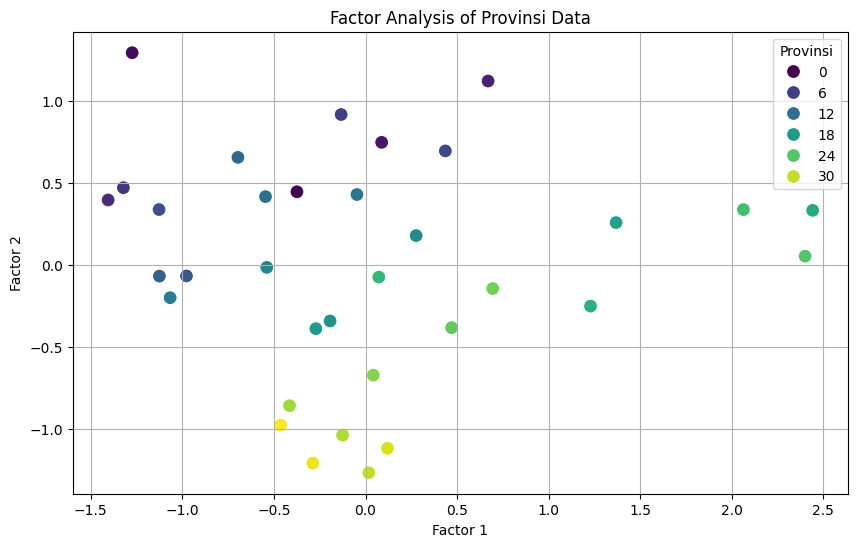

In [ ]:
!pip install factor_analyzer
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity

# Calculate KMO
kmo_all, kmo_model = calculate_kmo(X)
print(f'KMO Model: {kmo_model}')

# Calculate Bartlett's Test
chi_square_value, p_value = calculate_bartlett_sphericity(X)
print(f'Bartlett’s Test: Chi-Square Value = {chi_square_value}, p-value = {p_value}')

# Melakukan Analisis Faktor
fa = FactorAnalysis(n_components=2)
fa_components = fa.fit_transform(data_scaled)

# Menghitung eigenvalue dari matriks kovarians
cov_matrix = np.cov(data_scaled, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(f'Eigenvalues: {eigenvalues}')

# Membuat DataFrame untuk komponen faktor
factor_df = pd.DataFrame(data=fa_components, columns=['Factor1', 'Factor2'])

# Menambahkan kolom Provinsi kembali untuk keperluan interpretasi
factor_df['Provinsi'] = data['Provinsi']

# Menampilkan hasil Analisis Faktor
print("\nKomponen Faktor:")
print(factor_df.head())

# Menampilkan plot Analisis Faktor
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Factor1', y='Factor2', data=factor_df, hue='Provinsi', palette='viridis', s=100)
plt.title('Factor Analysis of Provinsi Data')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(title='Provinsi', loc='best', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

#Clustering Hirarki

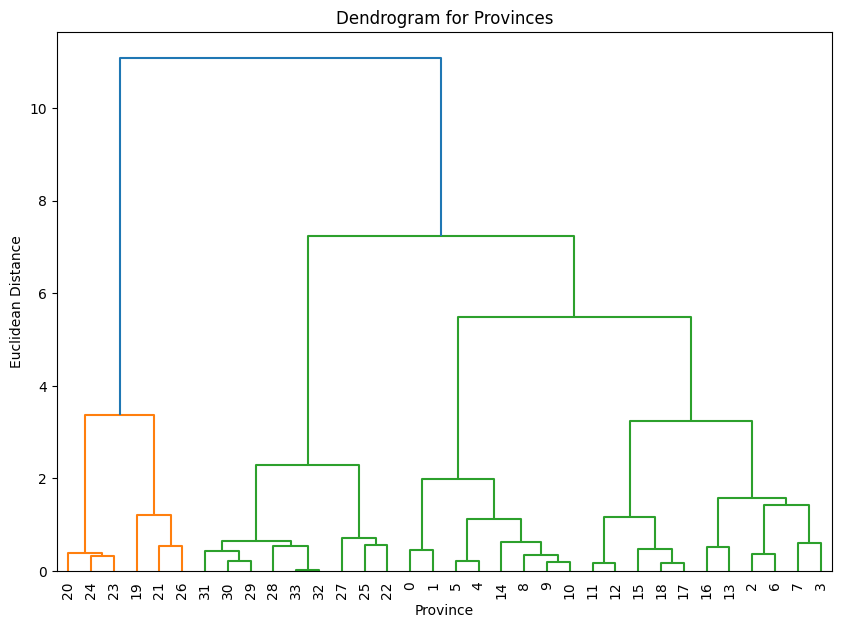

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# hierarchical clustering
Z = linkage(principal_components, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=data['Provinsi'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram for Provinces')
plt.xlabel('Province')
plt.ylabel('Euclidean Distance')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


        PC1       PC2  Provinsi  Cluster
0 -1.396395 -1.182780         0        0
1 -0.253085  1.765649        33        2
2  0.281617  1.537256        31        2
3  0.936162  0.663045        25        2
4  0.519928 -1.179186         7        0


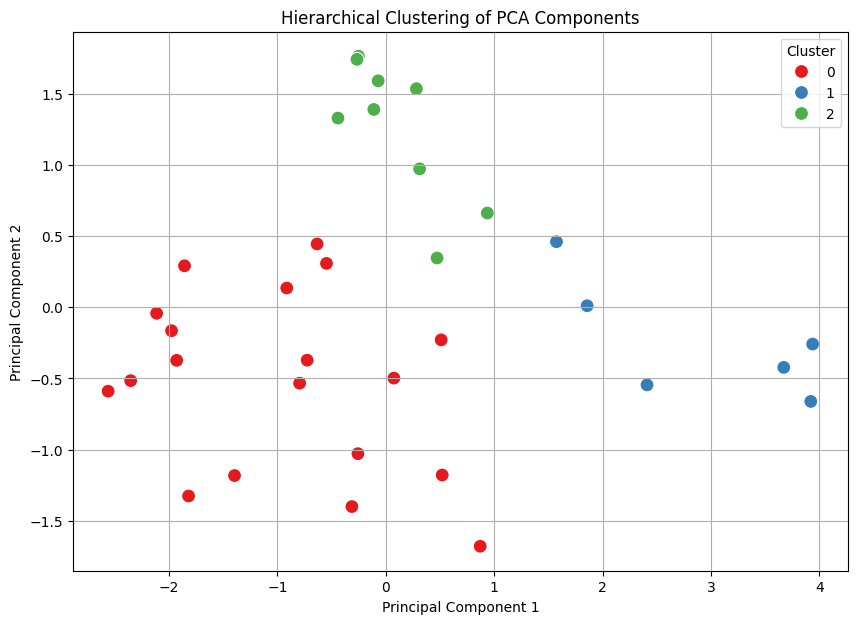

In [ ]:
#Agglomerative Clustering
n_clusters = 3  # Tentukan jumlah cluster yang diinginkan
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
agg_clusters = agg_cluster.fit_predict(principal_components)

# Menambahkan label cluster ke DataFrame principal_df
principal_df['Cluster'] = agg_clusters

# Menampilkan beberapa baris pertama dari DataFrame principal_df dengan label cluster
print(principal_df.head())

# Visualisasi scatter plot 2D dari hasil clustering hirarki
plt.figure(figsize=(10, 7))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)
plt.title('Hierarchical Clustering of PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()


#Clustering Non-Hirarki

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

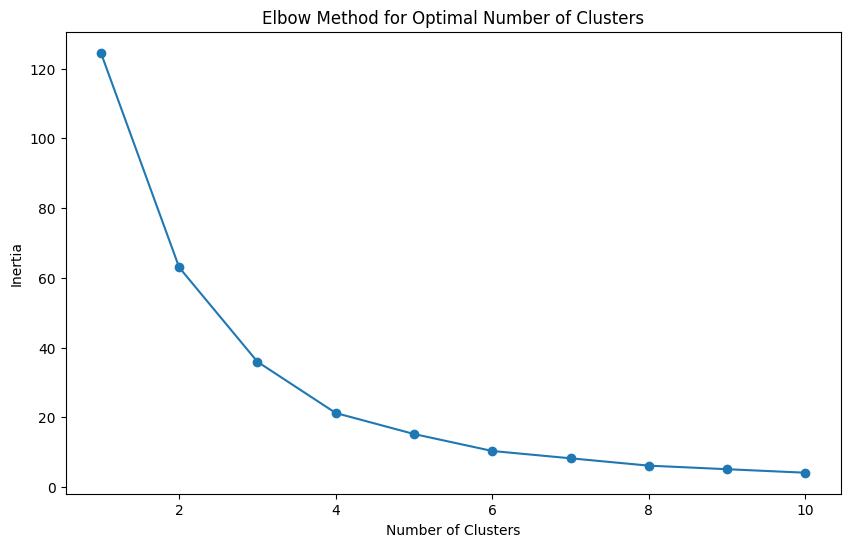

In [ ]:
from sklearn.cluster import KMeans

# Menentukan k optimal dengan metode elbow
inertia = []
for n in range(1, 11): #melakukan iterasi dari 1 hingga 10 untuk menentukan jumlah klaster yang berbeda.
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        PC1       PC2  Provinsi  Cluster  KMeans_Cluster
0 -1.396395 -1.182780         0        0               0
1 -0.253085  1.765649        33        2               2
2  0.281617  1.537256        31        2               2
3  0.936162  0.663045        25        2               2
4  0.519928 -1.179186         7        0               0


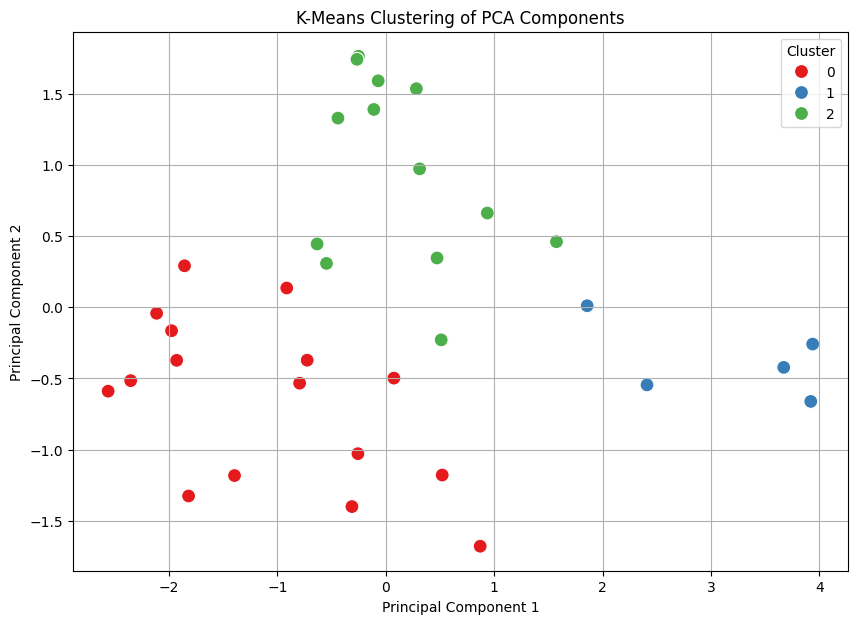

In [ ]:
# K-Means Clustering
n_clusters = 3  # jumlah klaster berdasarkan metode elbow
kmeans = KMeans(n_clusters=n_clusters, random_state=42) #membuat model K-Means dengan 3 klaster.
kmeans_clusters = kmeans.fit_predict(principal_components)

# Menambahkan label cluster ke DataFrame principal_df
principal_df['KMeans_Cluster'] = kmeans_clusters

# Menampilkan beberapa baris pertama dari DataFrame principal_df dengan label cluster
print(principal_df.head())

# Visualisasi scatter plot 2D dari hasil clustering K-Means
plt.figure(figsize=(10, 7))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='KMeans_Cluster', palette='Set1', s=100)
plt.title('K-Means Clustering of PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()


#SVD

Varians Rasio setiap komponen: [0.69712743 0.21881869]
Total varians rasio: 0.9159461152512234
Left singular vectors (U):
 [[-0.14341105 -0.21681645  0.30153713  0.30176564]
 [-0.02599206  0.32366273 -0.11368322 -0.21820205]
 [ 0.02892237  0.28179586  0.11609313  0.00468578]
 [ 0.09614469  0.12154335  0.10440956 -0.18799421]
 [ 0.05339707 -0.21615763 -0.06781457  0.18409077]
 [-0.02737343  0.31968957 -0.03029815  0.0536106 ]
 [ 0.0893768  -0.30790287  0.0790336  -0.04223614]
 [-0.06518346  0.08168179  0.21878504 -0.02708425]
 [ 0.05241481 -0.04194168 -0.05426231 -0.00273468]
 [-0.05626216  0.05664151  0.1826865   0.0587113 ]
 [-0.24181534 -0.09448649  0.15379179 -0.21654931]
 [-0.19822569 -0.06830602 -0.02256136 -0.0524775 ]
 [-0.20308179 -0.03014619  0.06254176  0.24097439]
 [-0.26318068 -0.10806112  0.00195857  0.0644782 ]
 [-0.21722996 -0.00770761  0.03849357  0.15039237]
 [-0.03214927 -0.25680212  0.07377427  0.23451625]
 [-0.18695924 -0.24316261 -0.30619794 -0.26338382]
 [ 0.19073

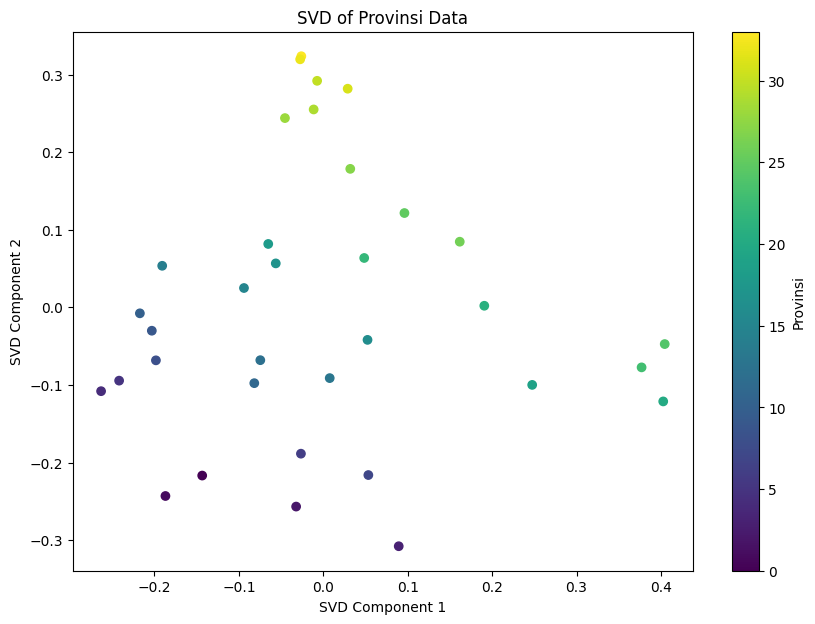

In [ ]:
# Menggunakan numpy untuk SVD konvensional
U, Sigma, VT = np.linalg.svd(data_scaled, full_matrices=False)

# Memilih dua komponen utama pertama
U_2d = U[:, :2]
Sigma_2d = np.diag(Sigma[:2])
VT_2d = VT[:2, :]

# Explained variance ratio
explained_variance = (Sigma[:2]**2) / (np.sum(Sigma**2))
print("Varians Rasio setiap komponen:", explained_variance)
print("Total varians rasio:", explained_variance.sum())

# Print left singular vectors, singular values, and right singular vectors
print("Left singular vectors (U):\n", U)
print("Singular values (Sigma):\n", Sigma)
print("Right singular vectors (V^T):\n", VT)

# Plotting the SVD results
plt.figure(figsize=(10, 7))
plt.scatter(U_2d[:, 0], U_2d[:, 1], c=data['Provinsi'], cmap='viridis')
plt.colorbar(label='Provinsi')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('SVD of Provinsi Data')
plt.show()

#Diskriminan

##LDA

In [ ]:
# Memisahkan fitur dan target
a = data2.drop('Diagnosis', axis=1)
b = data2['Diagnosis']

# Standarisasi fitur
scaler2 = StandardScaler()
a_scaled = scaler.fit_transform(a)

# Melakukan PCA
pca2 = PCA(n_components=8)  # Pilih jumlah komponen yang sesuai
a_pca = pca2.fit_transform(a_scaled)

# Menampilkan varians yang dijelaskan oleh setiap komponen utama
ev = pca2.explained_variance_ratio_
print("\nVarians yang dijelaskan oleh setiap komponen utama:")
print(ev)

# Menampilkan total varians yang dijelaskan oleh dua komponen utama
total_ev = sum(ev)
print(f"\nTotal varians yang dijelaskan oleh lima komponen utama: {total_ev * 100:.2f}%")


Varians yang dijelaskan oleh setiap komponen utama:
[0.10851923 0.10730897 0.10606658 0.10303621 0.10051312 0.09944962
 0.09736151 0.09451165]

Total varians yang dijelaskan oleh lima komponen utama: 81.68%


In [ ]:
from scipy.stats import shapiro

# Periksa distribusi normal untuk setiap komponen PCA
for i in range(a_pca.shape[1]):
    stat, p = shapiro(a_pca[:, i])
    print(f'PCA Component {i + 1}: p-value = {p}')

PCA Component 1: p-value = 0.01331848744302988
PCA Component 2: p-value = 8.087715541720759e-27
PCA Component 3: p-value = 0.0004737858835142106
PCA Component 4: p-value = 0.012394910678267479
PCA Component 5: p-value = 2.4361626856261864e-05
PCA Component 6: p-value = 0.2224387228488922
PCA Component 7: p-value = 1.1706725899784942e-07
PCA Component 8: p-value = 0.07816191762685776


##QDA

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Split data into training and testing sets
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

# Menerapkan QDA
qda = QuadraticDiscriminantAnalysis()

# Mengukur waktu komputasi untuk pelatihan
start_time = time.time()
qda.fit(a_train, b_train)
training_time = time.time() - start_time

# Mengukur waktu komputasi untuk prediksi
start_time = time.time()
b_pred_qda = qda.predict(a_test)
prediction_time = time.time() - start_time

# Evaluasi model QDA
accuracy_qda = accuracy_score(b_test, b_pred_qda)
print(f'Accuracy QDA: {accuracy_qda}')

# Confusion matrix dan classification report
print('\nConfusion Matrix QDA:')
print(confusion_matrix(b_test, b_pred_qda))
print('\nClassification Report QDA:')
print(classification_report(b_test, b_pred_qda))

# Menampilkan waktu komputasi
print(f'Training time: {training_time:.4f} seconds')
print(f'Prediction time: {prediction_time:.4f} seconds')

Accuracy QDA: 0.8176470588235294

Confusion Matrix QDA:
[[127  35]
 [ 27 151]]

Classification Report QDA:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       162
           1       0.81      0.85      0.83       178

    accuracy                           0.82       340
   macro avg       0.82      0.82      0.82       340
weighted avg       0.82      0.82      0.82       340

Training time: 0.0149 seconds
Prediction time: 0.0081 seconds
